In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)


In [3]:
from Tools.HyperPoly import HyperPoly

In [4]:
from Tools.reweighting import get_coordinates, get_coordinates_and_ref

get_coordinates_and_ref('excl_topW.root', is2D=True)

([(0.0, 0.0), (3.0, 0.0), (6.0, 0.0), (0.0, 3.0), (0.0, 6.0), (3.0, 3.0)],
 [0.0, 0.0])

In [5]:
cpt = np.arange(-40,41,1)
cpt;

## ttH

In [6]:
coordinates = [
    (0., 0.),
    (20., 0.),
    (40., 0.),
    (0., 20.),
    (0., 40.),
    (20., 20.),
]

ref_coordinates = [0., 0.]

ttH_hp = HyperPoly(2)
ttH_hp.initialize( coordinates, ref_coordinates )

ttH_xsecs_SMEFT_LO = np.array([1.034, 1.25, 1.913, 1.291, 2.053, 1.338])

ttH_coeff = ttH_hp.get_parametrization(ttH_xsecs_SMEFT_LO/ttH_xsecs_SMEFT_LO[0])

ttH_hp.eval(ttH_coeff, [20,20])


1.2940038684719468

In [7]:
ttH_cpt_vals = [ttH_hp.eval(ttH_coeff, [x, 0]) for x in cpt]
ttH_cpqm_vals = [ttH_hp.eval(ttH_coeff, [0, x]) for x in cpt]
ttH_corr_vals = [ttH_hp.eval(ttH_coeff, [x, x]) for x in cpt]
ttH_acorr_vals = [ttH_hp.eval(ttH_coeff, [x, -x]) for x in cpt]

## ttZ

In [8]:
def ttZ_scalePolyNLO(xt, xQM):
    return 1 + 0.072813*xt - 0.098492*xQM + 0.005049*xt**2 - 0.002042*xt*xQM + 0.003988*xQM**2

def ttZ_scalePolyLO(xt, xQM):
    return 1 + 0.068485*xt - 0.104991*xQM + 0.003982*xt**2 - 0.002534*xt*xQM + 0.004144*xQM**2


In [9]:
ttZ_scalePolyLO(0,20)

0.5577799999999997

In [10]:
ttZ_cpt_vals = [ttZ_scalePolyLO(x, 0) for x in cpt]
ttZ_cpqm_vals = [ttZ_scalePolyLO(0, x) for x in cpt]
ttZ_corr_vals = [ttZ_scalePolyLO(x, x) for x in cpt]
ttZ_acorr_vals = [ttZ_scalePolyLO(x, -x) for x in cpt]

## ttW QED

In [11]:
coordinates = [
    (0., 0.),
    (3., 0.),
    (6., 0.),
    (0., 3.),
    (0., 6.),
    (3., 3.),
]

ref_coordinates = [0., 0.]

ttW_hp = HyperPoly(2)
ttW_hp.initialize( coordinates, ref_coordinates )

ttW_xsecs_SMEFT_LO = np.array([0.0471, 0.0432, 0.0526, 0.0593, 0.0848, 0.0515])

ttW_coeff = ttW_hp.get_parametrization(ttW_xsecs_SMEFT_LO/ttW_xsecs_SMEFT_LO[0])

ttW_hp.eval(ttW_coeff, [20,20])

9.162302429818377

In [12]:
ttW_cpt_vals = [ttW_hp.eval(ttW_coeff, [x, 0]) for x in cpt]
ttW_cpqm_vals = [ttW_hp.eval(ttW_coeff, [0, x]) for x in cpt]
ttW_corr_vals = [ttW_hp.eval(ttW_coeff, [x, x]) for x in cpt]
ttW_acorr_vals = [ttW_hp.eval(ttW_coeff, [x, -x]) for x in cpt]

## tZq

In [13]:
coordinates = [
    (0., 0.),
    (10., 0.),
    (20., 0.),
    (0., 10.),
    (0., 20.),
    (10., 10.),
]

ref_coordinates = [0., 0.]

tZq_hp = HyperPoly(2)
tZq_hp.initialize( coordinates, ref_coordinates )

tZq_xsecs_SMEFT_LO = np.array([0.4744, 0.5222, 0.6129, 0.6288, 0.8914, 0.6333])

tZq_coeff = tZq_hp.get_parametrization(tZq_xsecs_SMEFT_LO/tZq_xsecs_SMEFT_LO[0])

tZq_hp.eval(tZq_coeff, [20,20])

1.805860033726805

In [14]:
tZq_cpt_vals = [tZq_hp.eval(tZq_coeff, [x, 0]) for x in cpt]
tZq_cpqm_vals = [tZq_hp.eval(tZq_coeff, [0, x]) for x in cpt]
tZq_corr_vals = [tZq_hp.eval(tZq_coeff, [x, x]) for x in cpt]
tZq_acorr_vals = [tZq_hp.eval(tZq_coeff, [x, -x]) for x in cpt]

In [19]:
tZq_coeff

array([ 1.00000000e+00,  5.55438449e-03,  2.11424958e-02,  4.52150084e-04,
       -9.12731872e-04,  1.14038786e-03])

## Results

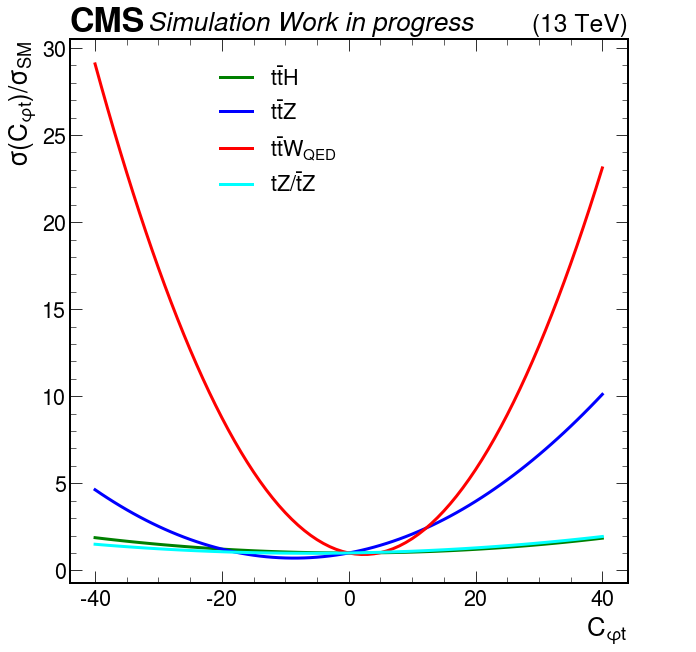

In [15]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_cpt_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_cpt_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_cpt_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_cpt_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)


ax.set_xlabel(r'$C_{\varphi t}$')
ax.set_ylabel(r'$\sigma(C_{\varphi t})/\sigma_{SM}$')

plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.23, 0.88, 0.90, .11),
        mode="expand",
)

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpt_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpt_scaling_all.pdf')


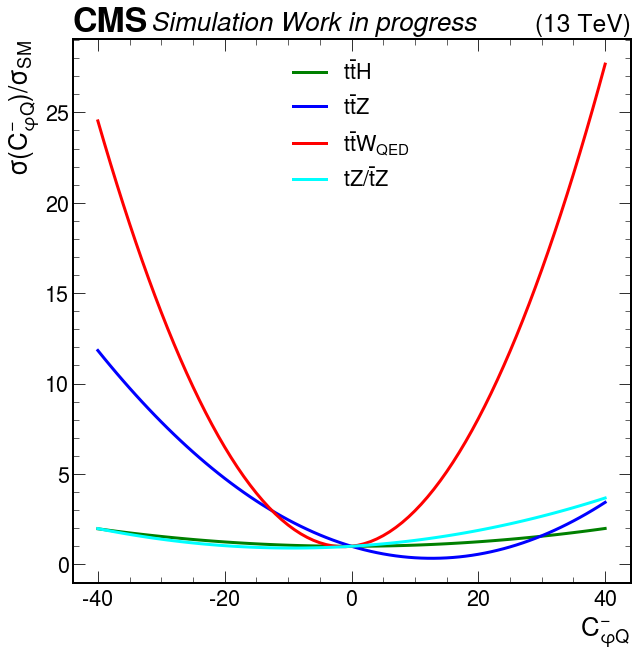

In [16]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_cpqm_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_cpqm_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_cpqm_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_cpqm_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)

ax.set_xlabel(r'$C_{\varphi Q}^{-}$')
ax.set_ylabel(r'$\sigma(C_{\varphi Q}^{-})/\sigma_{SM}$')

plt.legend()

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpqm_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpqm_scaling_all.pdf')


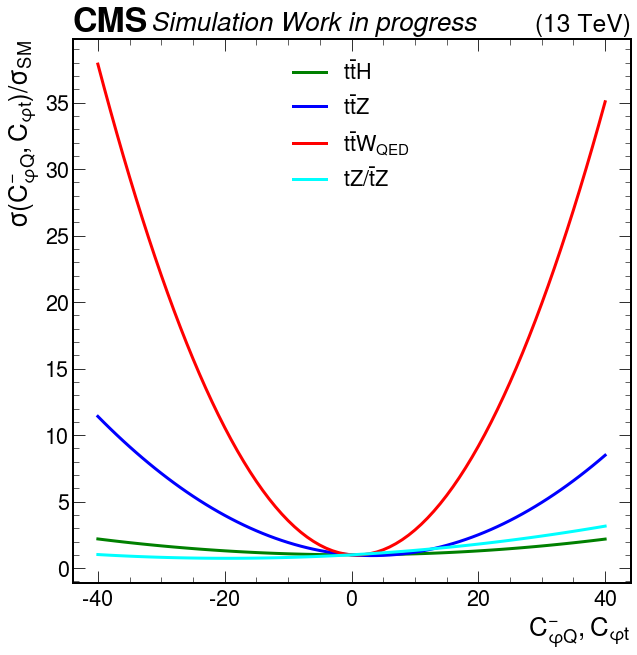

In [17]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_corr_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_corr_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_corr_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_corr_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)

ax.set_xlabel(r'$C_{\varphi Q}^{-}, C_{\varphi t}$')
ax.set_ylabel(r'$\sigma(C_{\varphi Q}^{-}, C_{\varphi t})/\sigma_{SM}$')

plt.legend()

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/corr_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/corr_scaling_all.pdf')


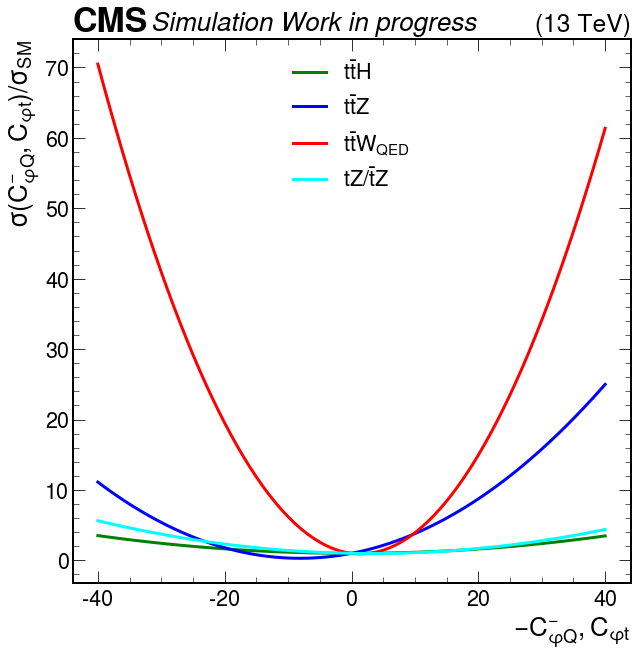

In [18]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_acorr_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_acorr_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_acorr_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_acorr_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)

ax.set_xlabel(r'$-C_{\varphi Q}^{-}, C_{\varphi t}$')
ax.set_ylabel(r'$\sigma(C_{\varphi Q}^{-}, C_{\varphi t})/\sigma_{SM}$')

plt.legend()

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/acorr_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/acorr_scaling_all.pdf')